In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 )
conv_base.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

This notebook relies on you having already split the data in the previous notebook.  
This function is getting the output of the VGG16 convolutional base

In [3]:
base_dir = os.path.join(os.getcwd(), 'data', 'min')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        print(i*batch_size, sample_count)
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i+1)* batch_size] = features_batch
        labels[i * batch_size: (i+1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


### Computationally Expensive

In [4]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
0 2000
20 2000
40 2000
60 2000
80 2000
100 2000
120 2000
140 2000
160 2000
180 2000
200 2000
220 2000
240 2000
260 2000
280 2000
300 2000
320 2000
340 2000
360 2000
380 2000
400 2000
420 2000
440 2000
460 2000
480 2000
500 2000
520 2000
540 2000
560 2000
580 2000
600 2000
620 2000
640 2000
660 2000
680 2000
700 2000
720 2000
740 2000
760 2000
780 2000
800 2000
820 2000
840 2000
860 2000
880 2000
900 2000
920 2000
940 2000
960 2000
980 2000
1000 2000
1020 2000
1040 2000
1060 2000
1080 2000
1100 2000
1120 2000
1140 2000
1160 2000
1180 2000
1200 2000
1220 2000
1240 2000
1260 2000
1280 2000
1300 2000
1320 2000
1340 2000
1360 2000
1380 2000
1400 2000
1420 2000
1440 2000
1460 2000
1480 2000
1500 2000
1520 2000
1540 2000
1560 2000
1580 2000
1600 2000
1620 2000
1640 2000
1660 2000
1680 2000
1700 2000
1720 2000
1740 2000
1760 2000
1780 2000
1800 2000
1820 2000
1840 2000
1860 2000
1880 2000
1900 2000
1920 2000
1940 2000
1960 2000
1980 2000
Found 1000 ima

In [5]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [6]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [8]:
history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.5928 - acc: 0.6845 - val_loss: 0.4408 - val_acc: 0.8290
Epoch 2/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.4219 - acc: 0.8125 - val_loss: 0.3550 - val_acc: 0.8660
Epoch 3/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3542 - acc: 0.8585 - val_loss: 0.3187 - val_acc: 0.8810
Epoch 4/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3263 - acc: 0.8620 - val_loss: 0.2942 - val_acc: 0.8950
Epoch 5/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2849 - acc: 0.8940 - val_loss: 0.2790 - val_acc: 0.9000
Epoch 6/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2669 - acc: 0.8940 - val_loss: 0.2745 - val_acc: 0.8950
Epoch 7/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2465 - acc: 0.9045 - val_loss: 0.2598 - val_acc: 0.9010
Epoch 8/30
200

In [9]:
import matplotlib.pyplot as plt
epochs = range(0, len(history.history['acc']))
plt.plot(epochs, history.history['acc'], 'bo', label="Training Accuracy")
plt.plot(epochs, history.history['val_acc'], 'b', label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.figure()
plt.plot(epochs, history.history['loss'], 'bo', label="Training Loss")
plt.plot(epochs, history.history['val_loss'], 'b', label="Validation Loss")
plt.title("Training and validation loss")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [10]:
model.save('pretrained_full_train.h5')

The convolutional base output's last axis is the filter dimension.  
The loss is the mean of all values of the 0th filter. Gradient Descent will maximize a blank input image to activate this filter

In [11]:
def deprocess_image(x):
    x -= x.mean()
    x /= x.std() + 1e-5
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [12]:
from keras import backend as K
def generate_pattern(l_name, f_index, size=150):
    print(l_name, f_index)
    layer_output = conv_base.get_layer(l_name).output
    loss = K.mean(layer_output[:,:,:,f_index])
    grads = K.gradients(loss, conv_base.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([conv_base.input], [loss, grads])
    input_image_data = np.zeros((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_image_data])
        input_image_data += grads_value * step
    return deprocess_image(input_image_data[0])

block2_conv2 60
(150, 150, 3)


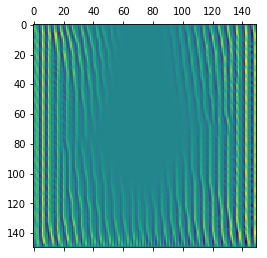

In [21]:
import matplotlib.pyplot as plt
filterActivation = generate_pattern('block2_conv2', 60)
print(filterActivation.shape)
plt.matshow(filterActivation[:,:,0])

In [16]:
layer_name = 'block5_conv1'
amount = 6
layer = conv_base.get_layer(layer_name)
layer_size = layer.output.shape[3]

In [17]:
import matplotlib.pyplot as plt
subFrom = layer_size - amount
patterns = [generate_pattern(layer_name, i) for i in range(layer_size - subFrom)]

block5_conv1 0
block5_conv1 1
block5_conv1 2
block5_conv1 3
block5_conv1 4
block5_conv1 5


(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


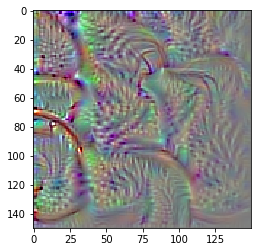

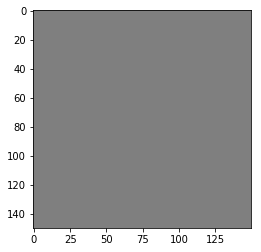

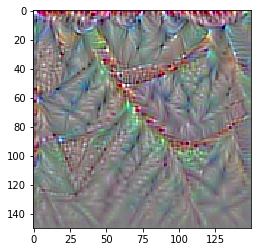

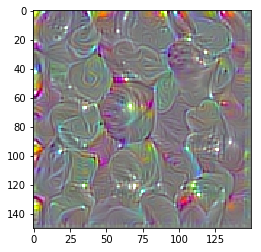

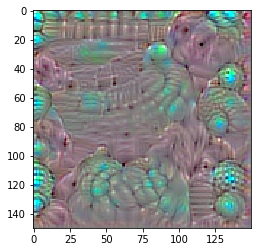

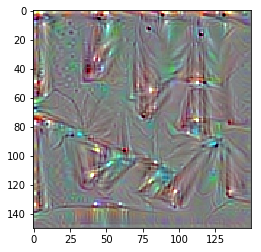

<Figure size 432x288 with 0 Axes>

In [18]:
for pattern in patterns:
    plt.imshow(pattern)
    plt.figure()
    print(pattern.shape)